<h1 style="font-size:3rem;color:#A3623B;">Lab 5: Support Vector Machines</h1>

## Security and Ethical aspects of data
### Amaya Nogales Gómez


<h2> Part 1: The kernel trick. Non-linear transformations.</h2>

If the data is not linearly separable in the original space, then we could apply transformations to the data, which map the data from the original space into a higher dimensional feature space, also called the kernel trick. 

The goal is that after the transformation to the higher dimensional space, the classes become linearly separable in this higher dimensional feature space. 

We can then fit a decision boundary to separate the classes and make predictions. The decision boundary will be a hyperplane in this higher dimensional space.

Since it is hard to visualize high dimensional data, we first focus on some examples of $\mathbb{R}\rightarrow\mathbb{R}^2$ transformations.



In [39]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, metrics
from sklearn.datasets import make_circles
import glob
import os
from mpl_toolkits.mplot3d import Axes3D
import IPython.display as IPdisplay
import pandas as pd
import random 
import math
from PIL import Image
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

In this example, we first plot our original data points. 

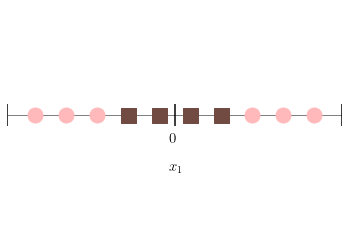

In [40]:
X1=np.linspace(-5,5,10)
Y1=np.array([1,1,1,0,0,0,0,1,1,1])
C=np.array([2,2,2,2,2,2,2,2,2,2])
fig = plt.figure()
ax = fig.add_subplot(111)
# draw lines
xmin = -6
xmax = 6
y = 2
height = 1
ax.set_xlim(xmin,xmax)
ax.set_ylim(y-2,y+2)

plt.hlines(y, xmin, xmax,'k',linewidth=0.5)
plt.vlines(xmin, 1.8, 2.2,'k')
plt.vlines(xmax, 1.8, 2.2,'k')
# draw a point on the line

plt.vlines(0, 1.8, 2.2,'k')
plt.text(-0.2,1.5,r"$0$",fontsize=15)
plt.text(-0.2,1,r"$x_1$",fontsize=15)


plt.plot(X1[Y1==1],C[Y1==1], 'o', ms = 15, color='#FFB9BA')
plt.plot(X1[Y1==0],C[Y1==0], 's', ms = 15, color='#714A41')




plt.axis('off')
plt.show()

#plt.savefig('line.pdf')

In $\mathbb{R}$ (dimension 1), this data is not linearly separable, but after applying the kernel trick, with $\phi(x_1)=(x_1,x_1^2)$ and adding this second dimension to our feature space, the classes become linearly separable. 

Although skelearn has the property to change the kernel direcly with the "kernel" parameter, we will do the transformation ourselves and then solve the SVM for the transformed data.

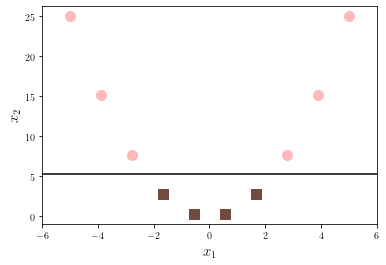

Accuracy of 100.00


In [41]:
X1_p=X1
X2_p=X1[:]*X1[:]

X1_PRO=np.c_[X1_p, X2_p]
fig = plt.figure()
ax  = fig.add_subplot(111)
plt.scatter(X1_PRO[Y1==1][:, 0], X1_PRO[Y1==1][:, 1], color='#FFB9BA', marker='o', s = 100)
plt.scatter(X1_PRO[Y1==0][:, 0], X1_PRO[Y1==0][:, 1], color='#714A41', marker='s', s=100)

ax.set_xlim(-6,6)
model = svm.SVC(kernel='linear')
clf = model.fit(X1_PRO, Y1)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
x = np.linspace(-6,6,30)
z = (-clf.intercept_[0]-clf.coef_[0][0]*x) / clf.coef_[0][1]

ax.plot(x,z,'k')
plt.xlabel(r"$x_1$",fontsize=15)
plt.ylabel(r"$x_2$",fontsize=15)

y_pred=clf.predict(X1_PRO)

#plt.savefig('2d.pdf')
plt.show()

print("Accuracy of %.2f" %(metrics.accuracy_score(Y1, y_pred)*100))

## Questions:


**1-** Repeat the example above for $x_1=$X1, $y=[1,1,1,1,0,0,0,0,0,1]$, $\phi(x_1)=(x_1,2x_1^2+3)$.

1.1. Plot (X1,Y1).

1.2. Calculate X_1PRO, the projection of X1 in $\mathbb{R}^2$.

1.3. Solve the SVM for X1_PRO data and Y1 label.

1.4. Plot X1_PRO and the SVM classifier.

1.5. Provide the accuracy.


**2-** Repeat the example above for $x_1=$, $y=[1,0,1,0,1,0,1,0,0,1]$, $\phi(x_1)=(x_1,x_1 mod\, 2)$.
    
2.1. Plot (X1,Y1).

2.2. Calculate X_1PRO, the projection of X1 in $\mathbb{R}^2$.

2.3. Solve the SVM for X1_PRO data and Y1 label.

2.4. Plot X1_PRO and the SVM classifier.

2.5. Provide the accuracy.



## And now in 3D: $\mathbb{R}^2 \rightarrow \mathbb{R}^3$

Now let us look at the example seen in Lecture 5 where our original data is not linearly separable in two dimensions. Here is our non-linearly separable data, in the input space.

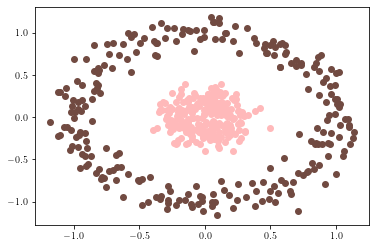

In [42]:
# Generate the dataset
X1, Y1 = make_circles(n_samples=500, noise=0.1, factor=0.2)
frac0 = len(np.where(Y1 == 0)[0]) / float(len(Y1))
frac1 = len(np.where(Y1 == 1)[0]) / float(len(Y1))

# Plot the dataset

#plt.figure(figsize=(10, 8))
#plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)

plt.subplot(111)
plt.scatter(X1[Y1==1][:, 0], X1[Y1==1][:, 1], color='#FFB9BA', marker='o', s=30, linewidth=1.5, label= "Class +1:versicolor")
plt.scatter(X1[Y1==0][:, 0], X1[Y1==0][:, 1], color='#714A41', marker='o', s=30, linewidth=1.5, label = "Class -1:setosa")

plt.show()
#plt.savefig('circles.pdf')

And after applying the transformation $\phi(x_1,x_2)=(x_1^2,\sqrt{2}x_1x_2,x_2^2)$:

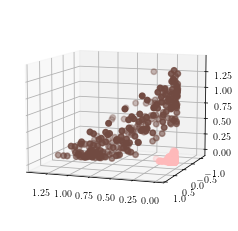

In [43]:
X1_p=X1[:,0]*X1[:,0]
X2_p=math.sqrt(2)*X1[:,0]*X1[:,1]
X3_p=X1[:,1]*X1[:,1]

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.scatter3D(X1_p[Y1==1], X2_p[Y1==1],X3_p[Y1==1],color='#FFB9BA', marker='o', s=30, linewidth=1.5)
ax.scatter3D(X1_p[Y1==0], X2_p[Y1==0],X3_p[Y1==0],color='#714A41', marker='o', s=30, linewidth=1.5)


ax.view_init(9, 110)

Now we can obtain the SVM for the transformed data, being sure we are able to find a hyperplane that separates the data.

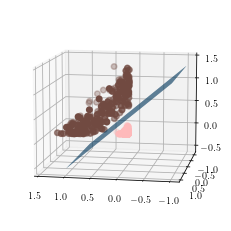

In [44]:
X1_p=X1[:,0]*X1[:,0]
X2_p=math.sqrt(2)*X1[:,0]*X1[:,1]
X3_p=X1[:,1]*X1[:,1]

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.scatter3D(X1_p[Y1==1], X2_p[Y1==1],X3_p[Y1==1],color='#FFB9BA', marker='o', s=30, linewidth=1.5)
ax.scatter3D(X1_p[Y1==0], X2_p[Y1==0],X3_p[Y1==0],color='#714A41', marker='o', s=30, linewidth=1.5)



X1_PRO=np.c_[X1_p, X2_p, X3_p]


model = svm.SVC(kernel='linear')
clf = model.fit(X1_PRO, Y1)

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]
tmp = np.linspace(-1,1,30)
x,y = np.meshgrid(tmp,tmp)
ax.plot_surface(x, y, z(x,y))

ax.view_init(10, 100)

And if we want to see the beatiful 3D picture in movement...

In [45]:
save_folder = 'images/phase-animate'

gif_filename = '01-pan-rotate-zoom-demo'
working_folder = '{}/{}'.format(save_folder, gif_filename)
if not os.path.exists(working_folder):
    os.makedirs(working_folder)

fig = plt.figure(figsize=(14, 10), dpi=80)
#ax = Axes3D(fig)
ax  = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.plot_surface(x, y, z(x,y),alpha=0.5)
ax.scatter3D(X1_p[Y1==1], X2_p[Y1==1],X3_p[Y1==1],color='#FFB9BA', marker='o', s=30, linewidth=1.5)
ax.scatter3D(X1_p[Y1==0], X2_p[Y1==0],X3_p[Y1==0],color='#714A41', marker='o', s=30, linewidth=1.5)  
ax.plot_surface(x, y, z(x,y),alpha=0.5, color='#667E91')



    

# create 36 frames for the animated gif
steps = 36

# a viewing perspective is composed of an elevation, distance, and azimuth
# define the range of values we'll cycle through for the distance of the viewing perspective
min_dist = 14.
max_dist = 20.
dist_range = np.arange(min_dist, max_dist, (max_dist-min_dist)/steps)

# define the range of values we'll cycle through for the elevation of the viewing perspective
min_elev = 10.
max_elev = 50.
elev_range = np.arange(max_elev, min_elev, (min_elev-max_elev)/steps)

# now create the individual frames that will be combined later into the animation
for azimuth in range(0, 360, int(360/steps)):
    
    # pan down, rotate around, and zoom out
    ax.azim = float(azimuth/3.)
    ax.elev = elev_range[int(azimuth/(360./steps))]
    ax.dist = dist_range[int(azimuth/(360./steps))]
    
    # set the figure title to the viewing perspective, and save each figure as a .png
   # fig.suptitle('elev={:.1f}, azim={:.1f}, dist={:.1f}'.format(ax.elev, ax.azim, ax.dist))
    plt.savefig('{}/{}/img{:03d}.png'.format(save_folder, gif_filename, azimuth))
    
    
# don't display the static plot...
#ax.view_init(30, 60)
plt.close()


# load all the static images into a list then save as an animated gif
gif_filepath = '{}/{}.gif'.format(save_folder, gif_filename)
images = [Image.open(image) for image in sorted(glob.glob('{}/*.png'.format(working_folder)))]
gif = images[0]
gif.info['duration'] = 100 #milliseconds per frame
gif.info['loop'] = 0 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])
IPdisplay.Image(url=gif_filepath)




## Questions:

**3-** Repeat the example above for $x_1$ and $y$ from the first example:<br />
$x_1=np.linspace(-5,5,10)$,<br /> $y=[1,1,1,0,0,0,0,1,1,1]$,<br /> and $\phi(x_1)=(x_1,x_1^2,x_1^2)$.
    
3.1. Plot (X1,Y1).

3.2. Calculate X_1PRO, the projection of X1 in $\mathbb{R}^3$.

3.3. Solve the SVM for X1_PRO data and Y1 label.

3.4. Plot X1_PRO and the SVM classifier.

3.5. Provide the accuracy.

3.* Plot the animated gif for X1_PRO and the SVM classifier.


**4-** Repeat the example above for $x_1$ and $y$ from exercise 2:<br /> 
$x_1=np.linspace(0,19,20)$<br />
$y=[1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]$,<br />
and $\phi(x_1)=(x_1,20*(x_1 mod\, 2),20*(x_1\, mod\, 2))$.

   
4.1. Plot (X1,Y1).

4.2. Calculate X_1PRO, the projection of X1 in $\mathbb{R}^3$.

4.3. Solve the SVM for X1_PRO data and Y1 label.

4.4. Plot X1_PRO and the SVM classifier.

4.5. Provide the accuracy.

4.* Plot the animated gif for X1_PRO and the SVM classifier.